# Mining Twitter (Based on Chapter 2 of the book 'Mastering...')

In this notebook you will learn the basic concepts of Twitter mining and will try to gather some data from Twitter. Follow the steps, and do the exercises in a copy of this notebook. For that, click in *File -> Make a copy...* button. Don't forget to rename it.

To include a new cell in the notebook, click on the plus sign on the toolbar, or tipe *Alt+Enter* to execute the current cell and create a new one. You can also click on the *Cell* menu.

## Important
You have to run all the commands of this document, and make sure that they were executed well. After you finish, you have to save it as PDF and submit. Click in File -> Download as -> PDF via Latex to do so. 

**If you don't have Latex at your computer**, simply use File -> Print Preview and generate the PDF from there.

## Installing libraries
If one of the libraries is missing, go to Anaconda, at the Environments tab on the left side of the window and find and install your library.

![Anaconda](./Pic16.png)

## Tweepy, Json and Python

To collect data and make it readable, two libraries will be used. Tweepy is a library that embed the twitter API functions making it easier to interact with the Twitter server.

Json is the format that the data is extracted from Twitter. For this reason, the library Json is also important.

## Create your own key at Twitter webpage
You need your own keys to have access to Twitter API. For that, go to https://apps.twitter.com/ then create a new App, and generate the keys. 

In case you have problems, watch the 5 first minutes of https://www.youtube.com/watch?v=pUUxmvvl2FE only. It is more than enough for this task.


## Put your keys here!

The variables where you should put your keys are below. So copy and paste all the 4 keys and paste them below.

The first part of this notebook shows you the Tweepy library being loaded, together with the os and sys libraries. Those are used to check files at your system and yield system messages in case it is necessary.

The two functions basically will read your tokens and keys and generate an object that can communicate with Twitter and ask for data. Don't be scared at first moment! Those functions are default for all twitter applications, and are very ugly, indeed. 

In [1]:
import os
import sys
from tweepy import API
from tweepy import OAuthHandler

In [2]:
def get_twitter_auth():
    """Setup Twitter authentication.

    Return: tweepy.OAuthHandler object
    """
    try:
        consumer_key = 'AlQL8pwAGZOQKt8FyrGXZuQk3'# os.environ['TWITTER_CONSUMER_KEY']
        consumer_secret = 'fwNMZMmOk8GHgySPoUnyWoStTPFjVd2ZSUMmkZ6spo4rBbqG2Z' # os.environ['TWITTER_CONSUMER_SECRET']
        access_token = '40952530-OWYhN5ypDqCDdyu1eHoqLlhLzaYryGrk7Dsd9iX3N' # os.environ['TWITTER_ACCESS_TOKEN']
        access_secret = 'w1FONctgWjDGqHz8Z40YPVOrtY4t9bXlIfJ3d1PcYmbCC' # os.environ['TWITTER_ACCESS_SECRET']
    except KeyError:
        sys.stderr.write("TWITTER_* environment variables not set\n")
        sys.exit(1)    
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    return auth

In [3]:
def get_twitter_client():
    """Setup Twitter API client.

    Return: tweepy.API object
    """
    auth = get_twitter_auth()
    client = API(auth)
    return client

## Getting tweets from your timeline
So the first thing I'm gonna do is to read my own tweets from my own timeline. For that, I'll use more stuff from Tweepy (the cursor) and also the library Json. The data dumped on us after we request something to Python API is in Json format. If you wanna learn more about that, feel free to enjoy http://www.w3schools.com/js/js_json_intro.asp

In [4]:
import json
from tweepy import Cursor

As you can see below there is no need for changes in the code. the client.home_timeline is the query for the Cursor, that will return 200 x 4 = 800 tweets from your home (that is the maximum you can get from your own timeline).

**Notice** that a file named home_timeline.jsonl will be generated on the same folder as you saved this notebook! You can open this file to see a very messy information about all your tweets (one per line).

In [5]:
client = get_twitter_client()

with open('home_timeline.jsonl', 'w') as f:
    for page in Cursor(client.home_timeline, count=200, include_rts=True).pages(4):
        for status in page:
            # Process a single status
            f.write(json.dumps(status._json, indent=4)+"\n")

## Activity 1

Open the file called home_timeline.jsonl and read it. Use a text editor for that, like Gedit (Linux), Notepad (Windows) or TextEdit (Mac OSx).
1. What kind of information do you see in the file?
2. Can you get your tweets from the file? If yes, how?
3. Can you say what is the code doing by just reading the lines?

## Getting tweets from another user's timeline
You can also get information about another user's timeline. And the good news are: you can get more than the 800 tweets you got before! But now you have to give the username of the twitter account you wanna take the tweets. We will read 3200 tweets from VUamsterdam account.

In [6]:
# Give the name of the account you want to crawl the data from.
user = 'VUamsterdam'
fname = "user_timeline_{}.jsonl".format(user)

In [7]:
# Collecting 16 pages of 200 tweets each.
with open(fname, 'w') as f:
    for page in Cursor(client.user_timeline, screen_name=user, count=200).pages(16):
        for status in page:
            f.write(json.dumps(status._json)+"\n")

## Good to know!
Using the Cursor to find tweets from your own account gives you a limit of 800 tweets maximum. When you use the second function, finding the tweets in a user timeline, this limit increaes to 3200.

It is also good to know the structure of a tweet. In our code above the *_json* attribute is the one saved in the file. This attribute contains all the information from the tweet in a JSON format. The JSON format is useful to keep the structure of the information to be saved, and it is the same as a dictionary. In our case, we are creating a jsonl file, or a list of jsons, because every line corresponds to the information of a tweet.

## Entity Analysis

Now that we can get the tweets in a timeline, we can also extract the hashtags and produce the list with the more common ones.

Remember that you have to change the name of your input (fname) if you are investigating another account!

In [8]:
from collections import Counter

def get_hashtags(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('hashtags', [])
    return [tag['text'].lower() for tag in hashtags]

In [9]:
# Read the file saved and extract the hashtags
with open(fname, 'r') as f:
    hashtags = Counter()
    for line in f:
        tweet = json.loads(line)
        hashtags_in_tweet = get_hashtags(tweet)
        hashtags.update(hashtags_in_tweet)
    for tag, count in hashtags.most_common(20):
        print("{}: {}".format(tag, count))

wvdw: 89
vuconferentie: 84
ech2016: 69
opendagvu: 56
vu: 49
vuevent: 41
vumag: 40
vusymposium: 27
oaj16: 22
vulezing: 19
vumasters: 18
vusustainable: 17
zwaartekrachtsgolven: 16
vumasterdag: 16
vufestival: 15
oaj: 15
vukabinet: 14
icc: 13
amsterdam: 13
diesvu: 12


## Question about your data set:
1. Do you have any insight by looking at the hashtags found in the page you are verifying? Can you explain why those hashtags are the most used?

### Going deeper...

We can have deeper analysis of the statistics of the hashtags, instead of a simple counting of the number of times each one is used.

In [10]:
from collections import defaultdict

with open(fname, 'r') as f:
    hashtag_count = defaultdict(int)
    for line in f:
        tweet = json.loads(line)
        hashtags_in_tweet = get_hashtags(tweet)
        n_of_hashtags = len(hashtags_in_tweet)
        hashtag_count[n_of_hashtags] += 1

    tweets_with_hashtags = sum([count for n_of_tags, count in hashtag_count.items() if n_of_tags > 0])
    tweets_no_hashtags = hashtag_count[0]
    tweets_total = tweets_no_hashtags + tweets_with_hashtags
    # print tweets_total
    tweets_with_hashtags_percent = '{:2f}'.format(tweets_with_hashtags * 100.0 / tweets_total )
    tweets_no_hashtags_percent = "{:2f}".format(tweets_no_hashtags * 100.0 / tweets_total )
    # print tweets_no_hashtags_percent
    print("{0} tweets without hashtags ({1}%)".format(tweets_no_hashtags, tweets_no_hashtags_percent))
    print("{} tweets with at least one hashtag ({}%)".format(tweets_with_hashtags, tweets_with_hashtags_percent))

    for tag_count, tweet_count in hashtag_count.items():
        if tag_count > 0:
            percent_total = "%.2f" % float(tweet_count * 100.0 / tweets_total )
            percent_elite = "%.2f" % float(tweet_count * 100.0 / tweets_with_hashtags)
            print("{} tweets with {} hashtags ({}% total, {}% elite)".format(tweet_count,
                                                                             tag_count,
                                                                             percent_total,
                                                                             percent_elite))

1916 tweets without hashtags (59.893717%)
1283 tweets with at least one hashtag (40.106283%)
975 tweets with 1 hashtags (30.48% total, 75.99% elite)
226 tweets with 2 hashtags (7.06% total, 17.61% elite)
49 tweets with 3 hashtags (1.53% total, 3.82% elite)
23 tweets with 4 hashtags (0.72% total, 1.79% elite)
8 tweets with 5 hashtags (0.25% total, 0.62% elite)
2 tweets with 6 hashtags (0.06% total, 0.16% elite)


## User mentions on tweets

In a similar way we can see user mentions

In [11]:
def get_mentions(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('user_mentions', [])
    return [tag['screen_name'] for tag in hashtags]

In [12]:
with open(fname, 'r') as f:
    users = Counter()
    for line in f:
        tweet = json.loads(line)
        mentions_in_tweet = get_mentions(tweet)
        users.update(mentions_in_tweet)
    for user, count in users.most_common(20):
        print("{}: {}".format(user, count))

VUamsterdam: 935
VU_Science: 217
VU_FGB: 201
VU_law: 138
advalvas_vu: 101
FGWVU: 96
VUalumnus: 93
FSW_VU: 81
MarjoleinJanse1: 76
mariekedehoon: 63
VUmcAmsterdam: 58
VU_FBW: 55
VU_Criminologie: 53
parool: 51
NPORadio1: 50
Godgeleerdheid: 48
markvanvugt1: 46
vinsub: 45
UniversiteitNL: 42
volkskrant: 39


## Tokenization and Text Analysis
Now we are gonna read the text of the tweets and process some of the words, checking some statistics also. For this we will use the NLTK library.

#### In case you have a problem like the one below, uncomment the following lines:
![./Problem01.png](./Problem01.png)

![./Problem01.png](./Solution01.png)

NLTK will be our Natural Language Library! You have to install it (possibly) to make the code work. So uncomment the code below if necessary, and after you install it, then comment it again.

In [14]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [15]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string

In [16]:
def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    """Process the text of a tweet:
    - Lowercase
    - Tokenize
    - Stopword removal
    - Digits removal

    Return: list of strings
    """
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    
    # If we want to normalize contraction, uncomment this
    tokens = normalize_contractions(tokens)
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit() and tok != u'\u2026'] 

In [17]:
def normalize_contractions(tokens):
    """Example of normalization for English contractions.

    Return: generator
    """
    token_map = {
        "i'm": "i am",
        "you're": "you are",
        "it's": "it is",
        "we're": "we are",
        "we'll": "we will",
    }
    for tok in tokens:
        if tok in token_map.keys():
            for item in token_map[tok].split():
                yield item
        else:
            yield tok

In [18]:
tweet_tokenizer = TweetTokenizer()

punct = list(string.punctuation)
stopword_list = stopwords.words('dutch') + punct + ['rt', 'via'] 

tf = Counter()
with open(fname, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tokens = process(text=tweet.get('text', ''),
                         tokenizer=tweet_tokenizer,
                         stopwords=stopword_list)
        tf.update(tokens)
    for tag, count in tf.most_common(30):
        print("\'{}\': {}".format(tag.encode('utf-8'), count))

'@vuamsterdam': 946
'vu': 302
'@vu_science': 217
'https': 206
'@vu_fgb': 202
'the': 194
'onderzoek': 148
'vu-hoogleraar': 147
'we': 142
'kom': 139
'@vu_law': 138
'nieuwe': 123
'tijdens': 113
'vandaag': 111
'’': 111
'https://t.…': 107
'@advalvas_vu': 101
'onze': 99
'a': 98
'@fgwvu': 96
'vanavond': 95
'studenten': 95
'https://t.c…': 93
'@vualumnus': 93
'to': 92
'#wvdw': 90
'https://t.co…': 87
'#vuconferentie': 85
'hoogleraar': 84
'amsterdam': 83


### Plotting frequency

Instead of printing the values of frequency we can create graphics that allow us to visualize the results better.

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

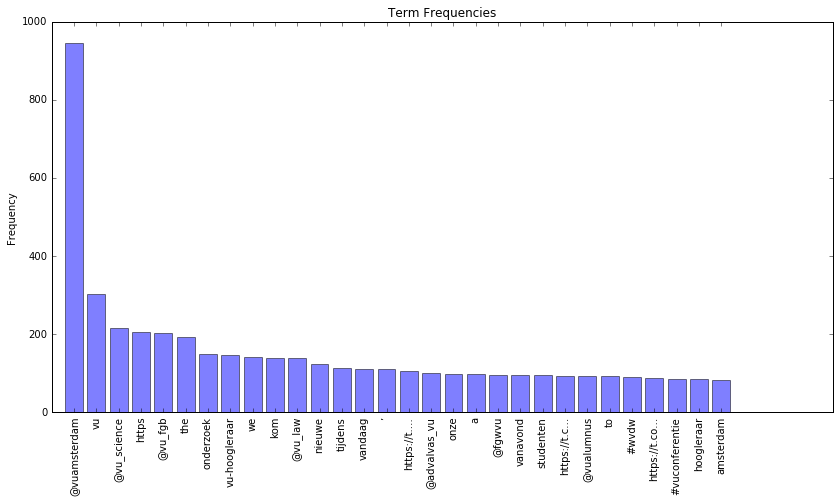

In [20]:
import numpy as np

tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('dutch') + punct + ['rt', 'via']


tf = Counter()
with open(fname, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tokens = process(text=tweet.get('text', ''),
                         tokenizer=tweet_tokenizer,
                         stopwords=stopword_list)
        tf.update(tokens)
        
    tags = [tag for tag, count in tf.most_common(30)]
    
    #print tags
    y = [count for tag, count in tf.most_common(30)]
    x = range(1, len(y)+1)

    plt.figure(figsize=(14,7), dpi=300)

    plt.bar(x, y, align='center', alpha=0.5)
    plt.title("Term Frequencies")
    plt.ylabel("Frequency")
    plt.xticks(range(1,len(tags)+1), tags, rotation=90)
    plt.savefig('term_distribution.png')

In [ ]:
### The same can be done for the hashtags

wvdw: 89
vuconferentie: 84
ech2016: 69
opendagvu: 56
vu: 49
vuevent: 41
vumag: 40
vusymposium: 27
oaj16: 22
vulezing: 19
vumasters: 18
vusustainable: 17
zwaartekrachtsgolven: 16
vumasterdag: 16
vufestival: 15
oaj: 15
vukabinet: 14
icc: 13
amsterdam: 13
diesvu: 12
vuamsterdam: 12
rio2016: 12
ontheroofff: 11
ll17: 11
mh17: 10
criminologie: 10
terugkijktip: 10
vrijheidsmaaltijd: 10
aardwetenschappen: 9
oaj17: 9


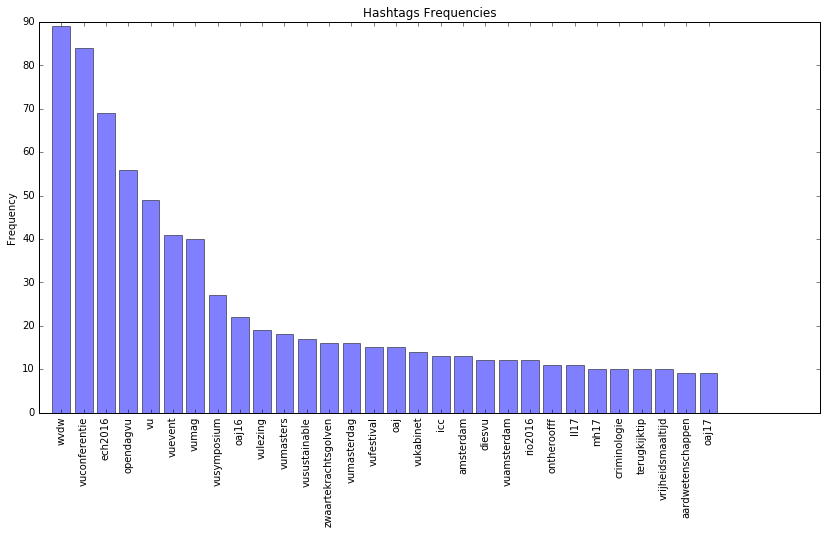

In [21]:
def get_hashtags(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('hashtags', [])
    return [tag['text'].lower() for tag in hashtags]

fname = 'user_timeline_VUamsterdam.jsonl'
with open(fname, 'r') as f:
    hashtags = Counter()
    for line in f:
        tweet = json.loads(line)
        hashtags_in_tweet = get_hashtags(tweet)
        hashtags.update(hashtags_in_tweet)
    for tag, count in hashtags.most_common(30):
        print("{}: {}".format(tag, count))

    tags = [tag for tag, count in hashtags.most_common(30)]
    
    #print tags
    y = [count for tag, count in hashtags.most_common(30)]
    x = range(1, len(y)+1)

    plt.figure(figsize=(14,7), dpi=300)

    plt.bar(x, y, align='center', alpha=0.5)
    plt.title("Hashtags Frequencies")
    plt.ylabel("Frequency")
    plt.xticks(range(1,len(tags)+1), tags, rotation=90)
    plt.savefig('hashtags_distribution.png')

## Activity 2
You might have run the code up to now based on the original example of the VU Amsterdam profile. Pick a new profile on Twitter and run the first part again. Also change the code above to show the 1000 most common hashtags. 

Can you tell about the results you obtained?
1. Why did you pick this page?
2. What is interesting about it when you verify the hashtags and the most common words?
3. What else would be interesting to do with the data obtained in this data set?

# Streaming
Streaming is a way to keep a 'door' open listening to the twitter flow of interactions over time. This allow us to collect more data than permited with all the restrictions of the API.

In [22]:
import string
import time
from tweepy import Stream
from tweepy.streaming import StreamListener

In [23]:
def format_filename(fname):
    """Convert fname into a safe string for a file name.

    Return: string
    """
    return ''.join(convert_valid(one_char) for one_char in fname)

In [24]:
def convert_valid(one_char):
    """Convert a character into '_' if "invalid".

    Return: string
    """
    valid_chars = "-_.%s%s" % (string.ascii_letters, string.digits)
    if one_char in valid_chars:
        return one_char
    else:
        return '_'

In [25]:
class CustomListener(StreamListener):
    """Custom StreamListener for streaming Twitter data."""

    def __init__(self, fname):
        safe_fname = format_filename(fname)
        self.outfile = "stream_%s.jsonl" % safe_fname

    def on_data(self, data):
        try:
            with open(self.outfile, 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            sys.stderr.write("Error on_data: {}\n".format(e))
            time.sleep(5)
        return True

    def on_error(self, status):
        if status == 420:
            sys.stderr.write("Rate limit exceeded\n".format(status))
            return False
        else:
            sys.stderr.write("Error {}\n".format(status))
            return True

The **stream** will run for 120 seconds and the query is Ajax OR footbal. If you want the occurrence of two values together, like Ajax AND football, we should pass the query = ['Ajax footbal']

In [26]:
query = ['Ajax', 'football']
query_fname = ' '.join(query) # string
auth = get_twitter_auth()
twitter_stream = Stream(auth, CustomListener(query_fname))
twitter_stream.filter(track=query, async=True)
time.sleep(120)
# TO stop your streaming...
twitter_stream.running = False

In [ ]:
# To stop your streaming before the time set...
twitter_stream.running = False

## Activity 3

Now, create your own query, and pay attention on where are the results of the query being saved. Can you tell just looking at the code?

Choose your query with wisdom, 'cause you are going to use it next. You can also increase the time if you want to capture more tweets.

# Sentiment Analysis of the Tweets

Change the file to your stream file in order to get the right dataset.

In [29]:
from unidecode import unidecode
tweets = []
text_tweets = []
fileTweets = "stream_Ajax_football.jsonl"
print fileTweets
with open(fname, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        #print tweet
        try:
            aux = { "text" : unidecode(tweet['text'].replace('"','')), "language": tweet['lang'],  "query" : query, "id" : tweet['id'] }
            text_tweets.append(tweet['text'])
            tweets.append(aux)
        except:
            print 'no text', tweet

stream_Ajax_football.jsonl


In [30]:
len(tweets)

3199

In [31]:
tweets[7]

{'id': 930139677222457344,
 'language': u'en',
 'query': ['Ajax', 'football'],
 'text': 'RT @Jos__A: Our class of 2016-2017 has officially graduated! Congratulations with your MSc in Business Administration - #HRM! @VU_SBE @VUam...'}

In [32]:
result = { "data" : tweets }

In [33]:
def parse_response(json_response):
    negative_tweets, positive_tweets = 0, 0
    for j in json_response["data"]:
        if int(j["polarity"]) == 0:
            negative_tweets += 1
        elif int(j["polarity"]) == 4:
            positive_tweets += 1
    return negative_tweets, positive_tweets

In [34]:
import urllib2
URL_SENTIMENT140 = "http://www.sentiment140.com/api/bulkClassifyJson"
req = urllib2.Request(URL_SENTIMENT140)
req.add_header('Content-Type', 'application/json')
response = urllib2.urlopen(req, str(result))
json_response = json.loads(response.read())
negative_tweets, positive_tweets = parse_response(json_response)

print "Positive Tweets: " + str(positive_tweets)
print "Negative Tweets: " + str(negative_tweets)

Positive Tweets: 884
Negative Tweets: 1


## Activity 4

1. Print a list of 5 positive and 5 negative tweets using the positive_tweets and negative_tweets list. (the responses are in the variable json_response)
2. Can you draw any hypotheses over why did you get this proportion of positive/negative tweets?

In [38]:
json_response

{u'data': [{u'id': 931048310848348160,
   u'language': u"u'nl'",
   u'meta': {u'language': u'en'},
   u'polarity': 4,
   u'query': [u'Ajax', u'football'],
   u'text': u'RT @vinsub: Vijf topopleidingen @VUamsterdam in Keuzegids Universiteiten 2018! Trots op!'},
  {u'id': 930851280548966400,
   u'language': u"u'nl'",
   u'meta': {u'language': u'en'},
   u'polarity': 2,
   u'query': [u'Ajax', u'football'],
   u'text': u'RT @FGWVU: NIEUWS: Bachelor opleidingen Philosophy, Poltics &amp; Economics (PPE) en Griekse en Latijnse Taal en Cultuur (GLTC) van @FGWVU zijn...'},
  {u'id': 930850022819844097,
   u'language': u"u'nl'",
   u'meta': {u'headline': True, u'language': u'en'},
   u'polarity': 2,
   u'query': [u'Ajax', u'football'],
   u'text': u'RT @VU_Science: Trots! Onze bachelors Aardwetenschappen en Biologie zijn beiden beoordeeld als topopleiding! https://t.co/Ntx1ADvPT7  #Topo...'},
  {u'id': 930750009846456320,
   u'language': u"u'nl'",
   u'meta': {u'language': u'en'},
   u'polarity'

# [Extra] Time Series Analysis
**If you have time, and wanna learn more about time series analysis, leave your stream running longer (for one hour or two, for instance) and try the code below. From this part on won't be graded!**

The time series analysis evaluates the tweets over time, giving us an idea about how many tweets were collected every minute. Remember to change the name of fname in case you changed your query.

In [39]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd
import numpy as np
import pickle

In [40]:
fname = 'stream_Ajax_football.jsonl'

with open(fname, 'r') as f:
    all_dates = []
    for line in f:
        tweet = json.loads(line)
        all_dates.append(tweet.get('created_at'))
    

In [41]:
ones = np.ones(len(all_dates))
idx = pd.DatetimeIndex(all_dates)
# the actual series (at series of 1s for the moment)
my_series = pd.Series(ones, index=idx)

In [42]:
# Resampling / bucketing into 1-minute buckets
per_minute = my_series.resample('1Min').sum().fillna(0)
print(my_series.head())
print(per_minute.head(30))

2017-11-16 15:40:32    1.0
2017-11-16 15:40:33    1.0
2017-11-16 15:40:34    1.0
2017-11-16 15:40:34    1.0
2017-11-16 15:40:34    1.0
dtype: float64
2017-11-16 15:40:00    128.0
2017-11-16 15:41:00    238.0
2017-11-16 15:42:00    134.0
Freq: T, dtype: float64


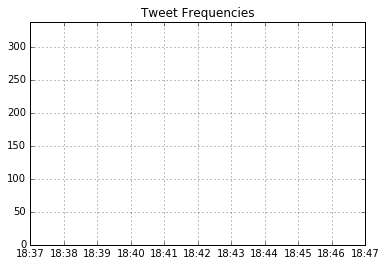

In [43]:
fig, ax = plt.subplots()
ax.grid(True)
ax.set_title("Tweet Frequencies")

hours = mdates.MinuteLocator(interval=1)
date_formatter = mdates.DateFormatter('%H:%M')

datemin = datetime(2016, 11, 12, 18, 37)
datemax = datetime(2016, 11, 12, 18, 47)

ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(date_formatter)
ax.set_xlim(datemin, datemax)
max_freq = per_minute.max()
ax.set_ylim(0, max_freq+100)
ax.plot(per_minute.index, per_minute)

#ax.xticks(rotation=90)

plt.savefig('tweet_time_series.png')

# [Extra] Users, Followers and Communities

This section is not part of the assignment. Just read and play with it if you wanna learn a little bit of how to get users that are followers or friends of a certain node.

In [44]:
client = get_twitter_client()
profile = client.get_user(screen_name='ericinlinux')
print(json.dumps(profile._json, indent=4))

{
    "follow_request_sent": false, 
    "has_extended_profile": false, 
    "profile_use_background_image": false, 
    "profile_text_color": "000000", 
    "default_profile_image": false, 
    "suspended": false, 
    "id": 40952530, 
    "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme15/bg.png", 
    "verified": false, 
    "translator_type": "none", 
    "profile_location": null, 
    "profile_image_url_https": "https://pbs.twimg.com/profile_images/1783085910/perfil1_normal.jpg", 
    "profile_sidebar_fill_color": "000000", 
    "entities": {
        "url": {
            "urls": [
                {
                    "url": "http://t.co/Jl7Ny3Vh7Q", 
                    "indices": [
                        0, 
                        22
                    ], 
                    "expanded_url": "http://garotoreformado.blogspot.com", 
                    "display_url": "garotoreformado.blogspot.com"
                }
            ]
        }, 
     

In [45]:
import time
import math

MAX_FRIENDS = 15000

def paginate(items, n):
    """Generate n-sized chunks from items"""
    for i in range(0, len(items), n):
        yield items[i:i+n]

In [46]:
screen_name = 'ericinlinux'

client = get_twitter_client()
dirname = "users/{}".format(screen_name)
max_pages = math.ceil(MAX_FRIENDS / 5000)

try:
    
    os.makedirs(dirname)
except OSError:
    print("Directory {} already exists".format(dirname))
except Exception as e:
    print("Error while creating directory {}".format(dirname))
    print(e)
    sys.exit(1)

In [47]:
# get followers for a given user
fname = "users/{}/followers.jsonl".format(screen_name)
with open(fname, 'w') as f:
    for followers in Cursor(client.followers_ids, screen_name=screen_name).pages(max_pages):
        for chunk in paginate(followers, 100):
            users = client.lookup_users(user_ids=chunk)
            for user in users:
                f.write(json.dumps(user._json)+"\n")
        if len(followers) == 5000:
            print("More results available. Sleeping for 60 seconds to avoid rate limit")
            time.sleep(60)

# get friends for a given user
fname = "users/{}/friends.jsonl".format(screen_name)
with open(fname, 'w') as f:
    for friends in Cursor(client.friends_ids, screen_name=screen_name).pages(max_pages):
        for chunk in paginate(friends, 100):
            users = client.lookup_users(user_ids=chunk)
            for user in users:
                f.write(json.dumps(user._json)+"\n")
        if len(friends) == 5000:
            print("More results available. Sleeping for 60 seconds to avoid rate limit")
            time.sleep(60)

# get user's profile
fname = "users/{}/user_profile.json".format(screen_name)
with open(fname, 'w') as f:
    profile = client.get_user(screen_name=screen_name)
    f.write(json.dumps(profile._json, indent=4))

You can see a folder called users in the same directory as this file with the json files there. You can try to extract information about the JSON files and get more from here.

Have fun!